#### Preparing our dataset

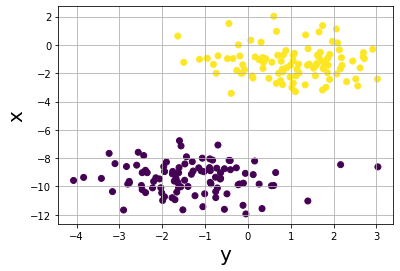

In [79]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.ylabel('x', size=20)
plt.xlabel('y', size=20)
plt.grid()

#### Implementing the Perceptron Logic

In [80]:
def unit_step_func(x):
  return np.where(x > 0, 1, 0)

class Perceptron:
  '''Implementing the Perceptron algorithm.'''
  def __init__(self, lr=0.1, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.activation_func = unit_step_func
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    '''training the dataset'''
    # initializing the weights and bias
    n_samples, n_features = X.shape
    self.weights = np.random.rand(n_features)
    self.bias = 0

    # learning Weights
    for _ in range(self.n_iters):
      temp = np.dot(X, self.weights) + self.bias
      y_pred = [self.activation_func(item) for item in temp]
      # Perceptron update rule
      self.weights += self.lr * np.dot(X.T, (y - y_pred))
      self.bias += self.lr * np.sum(y - y_pred)

  def predict(self, X):
    '''predicting for the dataset'''
    return self.activation_func(np.dot(X, self.weights) + self.bias) 

#### Testing the Perceptron

In [81]:
def accuracy(y_true, y_pred):
  return np.sum(y_true == y_pred) / len(y_true)

p = Perceptron(lr=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


#### Plotting the Classes

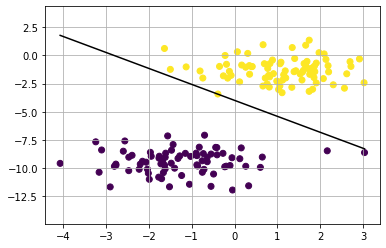

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.grid()

###### credits: https://www.youtube.com/watch?v=aOEoxyA4uXU